In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(image, name=''):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### 图像金字塔

图像金字塔是一种多分辨率表示方法，它将原始图像分解为多个**不同分辨率**的图像层。</br>每一层都是原始图像的一个缩小版本，并且包含了原始图像的某些信息。</br>图像金字塔可以用于许多图像处理任务，例如图像缩放、特征提取、图像增强和图像匹配等。

- 高斯金字塔
- 拉普拉斯金字塔

图像金字塔的主要组成部分是金字塔的底层（也称为原图或原始图像），以及通过不同级别的下采样（或上采样）得到的多个图像层。</br>下采样是指将图像的分辨率降低，而上采样则是将图像的分辨率提高。

<img src='assets/Pyramid_1.png' />

图像金字塔的构建通常采用以下步骤：</br>

1. 初始化：从原始图像开始，将其作为金字塔的底层。
2. 下采样：对底层图像应用低通滤波器（如高斯滤波器），然后将图像的分辨率降低一半。这个过程可以重复多次，每次都生成一3个新的图像层，并将其添加到金字塔中。
3. 构建：通过重复下采样过程，构建出一个由多个图像层组成的金字塔。最底层是原始图像，最顶层是分辨率最低的图像。

图像金字塔的每一层都包含有用的信息，但不同层的分辨率不同。</br>在处理图像时，可以根据需要选择金字塔中的不同层来获得所需的信息。例如，在进行图像匹配时，可以使用金字塔的高层图像（低分辨率）来搜索相似的物体，因为高层图像包含更少的细节，有利于在更大范围内搜索。而在需要高精度图像分析时，则可以利用金字塔的底层图像（高分辨率），因为它包含更多的细节信息。

#### 高斯金字塔：向下采样方法（缩小）cv2.pyrDown()

cv2.pyrDown() 函数是 OpenCV 库中的一个函数，用于对图像进行下采样，即降低图像的分辨率。这个过程通常在构建图像金字塔时使用，用于从高分辨率图像创建低分辨率图像层。

<img src='assets/Pyramid_2.png' /> 

##### dst = cv2.pyrDown(src)

参数：</br>
- src：输入图像，可以是灰度图像或者彩色图像。
- dst：输出图像，是 src 的下采样结果，其大小是 src 大小的四分之一。

#### 高斯金字塔：向上采样方法（放大）cv2.pyrUp()

cv2.pyrUp() 函数是 OpenCV 库中的一个函数，用于对图像进行上采样，即提高图像的分辨率。这个过程通常在图像金字塔的重建中使用，用于从低分辨率图像创建高分辨率图像层。

<img src='assets/Pyramid_3.png' />

##### dst = cv2.pyrUp(src)

参数：</br>
- src：输入图像，通常是金字塔中的低分辨率图像。
- dst：输出图像，是 src 的上采样结果，其大小是 src 大小的两倍。

In [21]:
n = np.zeros((2, 2))
n[0, 0] = 10
n[0, 1] = 30
n[1, 0] = 56
n[1, 1] = 96
print(n.shape)
for i in range(2):
    for j in range(2):
        print(n[i, j], end='\t')
    print('\n')
    
up = cv2.pyrUp(n)

print(up.shape)
for i in range(4):
    for j in range(4):
        print(up[i, j], end='\t')
    print('\n')

(2, 2)
10.0	30.0	

56.0	96.0	

(4, 4)
27.75	34.0	43.375	46.5	

40.5	48.0	59.25	63.0	

59.625	69.0	83.0625	87.75	

66.0	76.0	91.0	96.0	



#### 示例

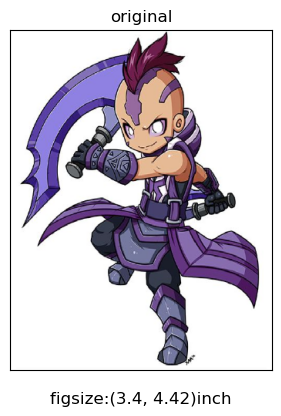

(442, 340, 3)


In [2]:
img = cv2.imread('assets/AM.png')
cv_show('original', img)
plt_show(img, 'original')
print(img.shape)

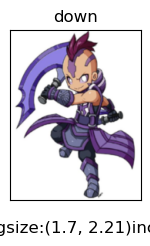

(221, 170, 3)


In [3]:
down = cv2.pyrDown(img)
cv_show('down', down)
plt_show(down, 'down')
print(down.shape)

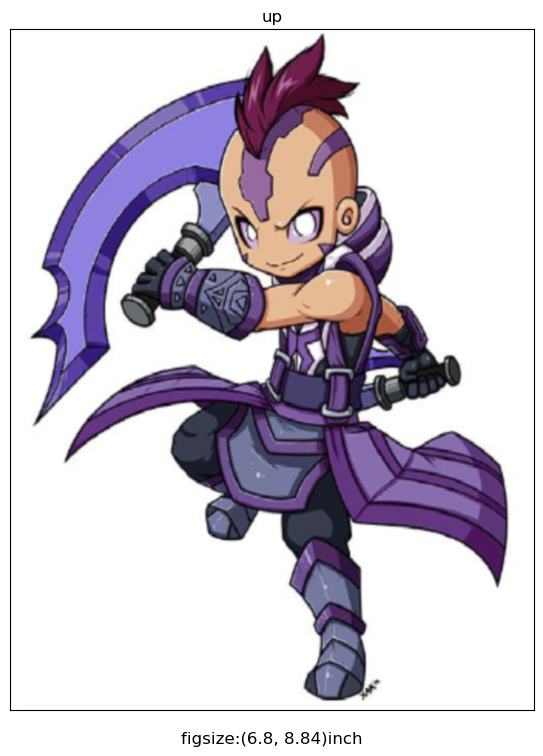

(884, 680, 3)


In [4]:
up = cv2.pyrUp(img)
cv_show('up', up)
plt_show(up, 'up')
print(up.shape)

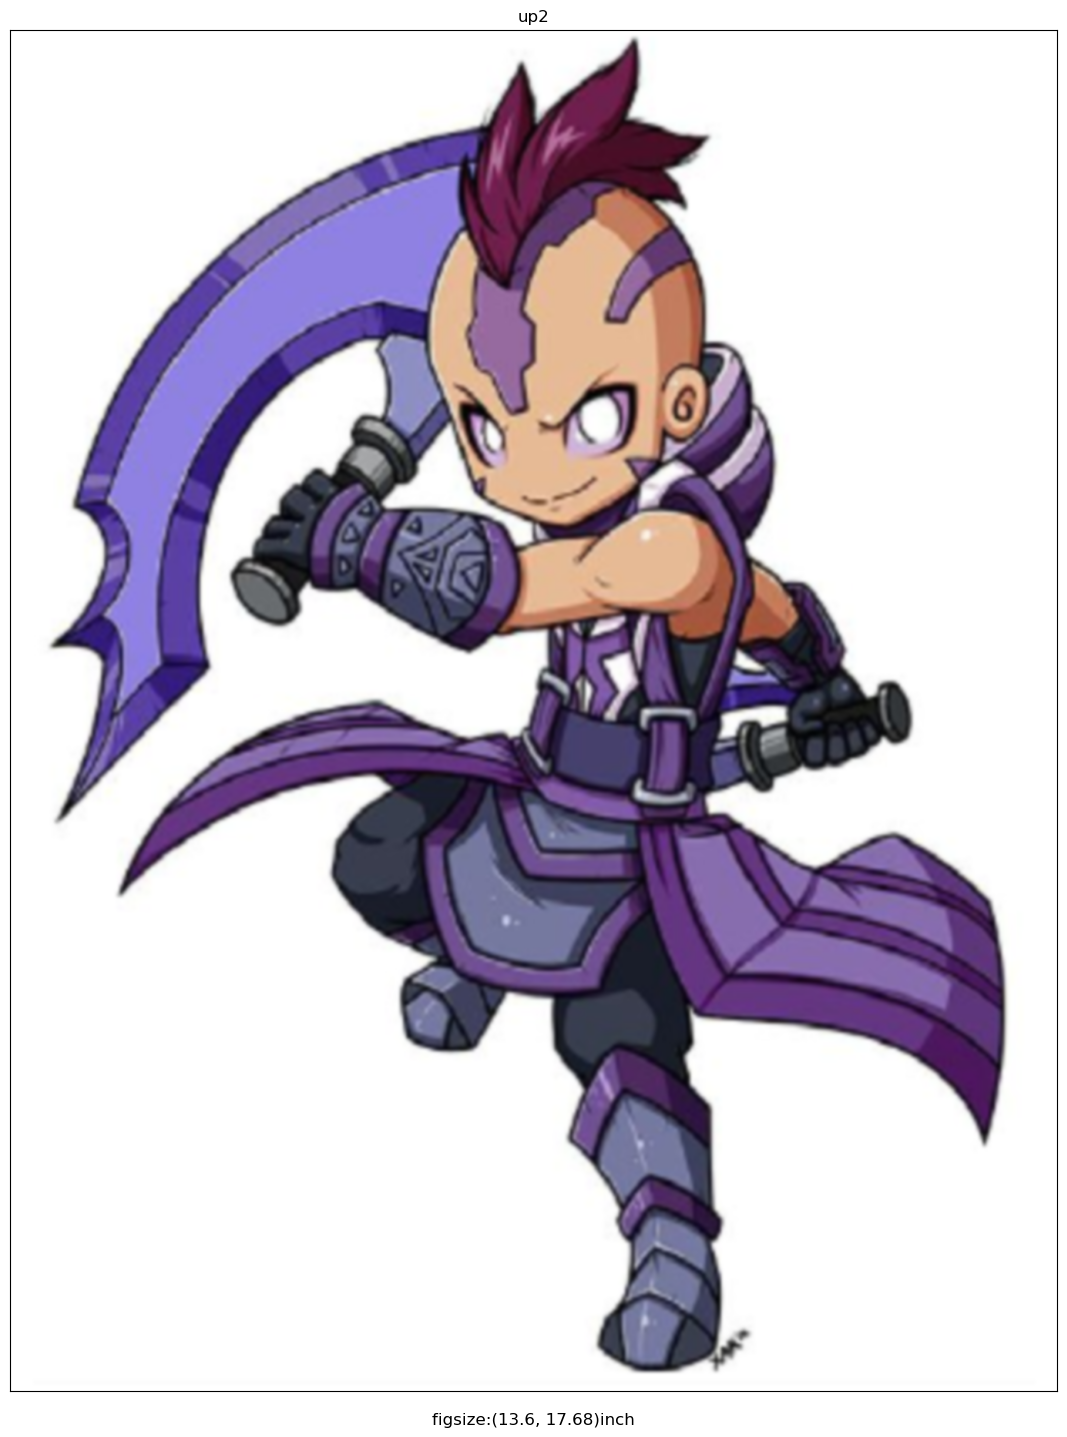

(1768, 1360, 3)


In [5]:
up2 = cv2.pyrUp(up)
cv_show('up2', up2)
plt_show(up2, 'up2')
print(up2.shape)

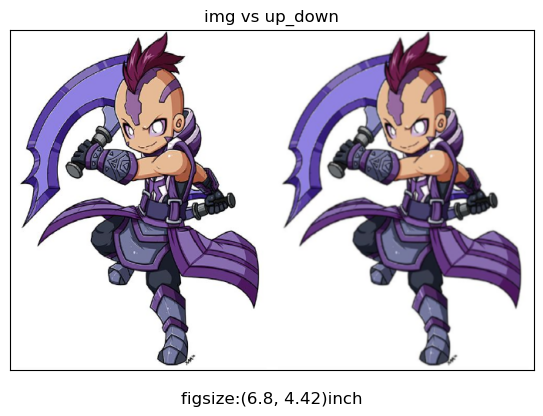

(442, 340, 3)


In [6]:
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up)
res = np.hstack((img, up_down))
cv_show('origin vs up_down', res)
plt_show(res, 'origin vs up_down')
print(up_down.shape)

#### 拉普拉斯金字塔

拉普拉斯金字塔（Laplacian Pyramid）是一种多分辨率图像表示方法，它将原始图像分解为多个不同分辨率的图像层，这些层包含着原始图像的低频和高频信息。拉普拉斯金字塔与高斯金字塔（Gaussian Pyramid）相似，但它们在某些方面有所不同。

拉普拉斯金字塔的构建通常包括以下步骤：</br>

1. 初始化：从原始图像开始，将其作为金字塔的底层。
2. 下采样：对底层图像应用高斯模糊（Gaussian Blur），然后将图像的分辨率降低一半。这个过程可以重复多次，每次都生成一个新的图像层，并将其添加到金字塔中。
3. 计算拉普拉斯差分：对于金字塔中的每一层，计算拉普拉斯差分，即将该层与相邻的下层图像进行相减。这个差分层包含了原始图像中的高频信息。

<img src='assets/Pyramid_4.png' />

In [30]:
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
# 拉普拉斯金字塔第1层
l_1 = img - down_up
cv_show('', l_1)